# Установим нужные библиотеки:
 - pandas - нужен для работы с данными и представления их в pd.DataFrame для более удобного взаимодействия 
 - pandas_profiling -  нужен для сбора и отображения информации о датасете в более удобном для человека виде
 - json_normalize - нужен для распаковки вложенного json для представления его в удобном для работе виде
 - json - эта библиотека  нужна для нормальной работы функции json_normolize
 - numpy - библиотека нужная для высокоэффективной работы с массивами и с математическими функциями

In [16]:
import pandas as pd
import pandas_profiling as pp
from pandas import json_normalize
import json
import numpy as np

Используя настройку отображения в pandas уберем отображение ограниченного количества колонок в Dataframe

In [17]:
pd.options.display.max_columns=None

Прочитаем скачанные с портала dtp-stat.ru данные в формате geojson о произошедших в РФ дорожно-транспортных происшествий
Объединим их в один большой датасет

In [18]:
df1 = pd.read_json('./Data/nenetskii-avtonomnyi-okrug.geojson')
df2 = pd.read_json('./Data/moskva.geojson')
df = pd.concat([df1,df2], axis = 0)
df

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
...,...,...
57125,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
57126,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
57127,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
57128,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."


Удалим солбец "type", т.к он не несет смысловой нагрузки

In [19]:
df.drop('type', axis = 1, inplace=True)
df

,features
0,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
1,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
2,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
3,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
4,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
...,...
57125,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
57126,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
57127,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
57128,"{'type': 'Feature', 'geometry': {'type': 'Poin..."


Т.к наши данные в формате geojson (от json этот формат отличается структурой, но все импользованные функции обратносовметимы как с JSON, так и с GEOJSON), для работы с ними нам нужно нормализовать их представление для анализа и преобразования данных

In [20]:
df = json_normalize(json.loads(df.to_json(orient='records')))
df

,features.type,features.geometry.type,features.geometry.coordinates,features.properties.id,features.properties.gibdd_id,features.properties.point.lat,features.properties.point.long,features.properties.participant_categories,features.properties.severity,features.properties.region,features.properties.parent_region,features.properties.datetime,features.properties.address,features.properties.participants_count,features.properties.injured_count,features.properties.dead_count,features.properties.category,features.properties.light,features.properties.nearby,features.properties.weather,features.properties.road_conditions,features.properties.vehicles,features.properties.participants,features.properties.tags,features.properties.scheme
0,Feature,Point,"[53.103822, 67.667859]",2566691,221349607,67.667859,53.103822,[Все участники],С погибшими,Ненецкий АО,Ненецкий автономный округ,2021-04-01 03:00:00,"рп Искателей, г. Нарьян-Мар - п. Искателей, 4 км",1,0,1,Съезд с дороги,"В темное время суток, освещение включено","[Жилые дома индивидуальной застройки, Остановк...",[Ясно],"[Недостатки зимнего содержания, Гололедица]","[{'brand': 'ВАЗ', 'model': 'ВАЗ 2131 и модифик...",[],[Дорожно-транспортные происшествия],610
1,Feature,Point,"[53.014097, 67.639032]",2548877,221293312,67.639032,53.014097,[Все участники],Легкий,Ненецкий АО,Ненецкий автономный округ,2021-02-24 13:40:00,"г Нарьян-Мар, ул Первомайская, 34",4,2,0,Столкновение,Светлое время суток,"[Многоквартирные жилые дома, Выезд с прилегающ...",[Пасмурно],"[Недостатки зимнего содержания, Гололедица]","[{'brand': 'TOYOTA', 'model': 'Corolla', 'colo...",[],[Дорожно-транспортные происшествия],420
2,Feature,Point,"[53.111397, 67.6666]",2557589,221345761,67.666600,53.111397,[Все участники],Тяжёлый,Ненецкий АО,Ненецкий автономный округ,2021-03-29 20:43:00,"рп Искателей, ул Юбилейная, 80 А",3,2,0,Столкновение,"В темное время суток, освещение включено","[Многоквартирные жилые дома, Выезд с прилегающ...",[Пасмурно],"[Недостатки зимнего содержания, Гололедица]","[{'brand': 'GREAT WALL', 'model': 'Прочие моде...",[],[Дорожно-транспортные происшествия],200
3,Feature,Point,"[56.498694, 67.193771]",2557591,221337139,67.193771,56.498694,[Все участники],Легкий,Ненецкий АО,Ненецкий автономный округ,2021-03-22 15:00:00,"г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...",2,1,0,Столкновение,Светлое время суток,[Нерегулируемый перекрёсток неравнозначных ули...,[Ясно],[Обработанное противогололедными материалами],"[{'brand': 'MAN', 'model': 'TGA', 'color': 'Бе...",[],[Дорожно-транспортные происшествия],410
4,Feature,Point,"[53.051348, 67.653941]",2548878,221253486,67.653941,53.051348,[Все участники],Тяжёлый,Ненецкий АО,Ненецкий автономный округ,2021-02-02 10:43:00,"г Нарьян-Мар, ул Юбилейная, 6",3,1,0,Столкновение,Светлое время суток,"[Мост, эстакада, путепровод]","[Пасмурно, Метель]","[Недостатки зимнего содержания, Со снежным нак...","[{'brand': 'NISSAN', 'model': 'Almera', 'color...",[],[Дорожно-транспортные происшествия],070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57338,Feature,Point,"[37.222163, 55.990395]",1576693,199851663,55.990395,37.222163,"[Дети, Велосипедисты, Все участники]",Тяжёлый,Савёлки,Москва,2016-09-21 15:25:00,"г Зеленоград, пл Центральная, 1",2,1,0,Наезд на велосипедиста,Светлое время суток,"[Многоквартирные жилые дома, Административные ...",[Пасмурно],"[Мокрое, Отсутствие, плохая различимость гориз...","[{'brand': 'HYUNDAI', 'model': 'Прочие модели ...",[],"[Дорожно-транспортные происшествия, ДТП и пост...",500
57339,Feature,Point,"[37.455556, 55.780833]",1556190,178885379,55.780833,37.455556,[Все участники],Легкий,Щукино,Москва,2015-10-03 16:30:00,"г Москва, ул Живописная, 3",3,1,0,Столкновение,Светлое время суток,"[Многоквартирные жилые дома, Выезд с прилегающ...",[Ясно],[Сухое],"[{'brand': 'VOLKSWAGEN', 'model': 'Tiguan', 'c...",[],[Дорожно-транспортные происшествия],300
57340,Feature,Point,"[37.559, 55.788]",1532007,208339747,5

Просмотрев на датасет и исходя из предметной области, для выявления особо опасных дорожных участков нам не потребуются признаки: 
 - features.typе, features.geometry.type - это данные не несущие смысл для нашей предметной области
 
 - features.properties.id, features.properties.gibdd_id - данные для идинтификации дорожно-транспортных происшествий нам не понадобятся, т.к они не несут никакого смысла на определение категорий опасности дорожно-транспортных происшествий
 
 - features.geometry.coordinates - это дублированные данные о координатах дорожного участка
 
 - features.properties.participant_categories - данные о категории участников не понадобятся для выявления особо опасных дорожных участков
 
 - features.properties.participants_count - количество участников ДТП не повлияет на опасность, т.к они будут выдавать лишний шум при моделировании, ведь главное для определения опасного и неопасного дорожного участка - это пострадавшие и смертность
 
 - features.properties.category - данные о типе ДТП не понадобятся для нашего изучения, тюк они не нужны для выявления особо опасных дорожных участков
 
 - features.properties.vehicles - данные об участниках - транспортных средствах нам не нужны, т.к онимобильны и не могут иметь влияния на определение уровня опасного дорожного участка
 
 - features.properties.tags - показатели с официального сайта ГИБДД нам тоже не сыграют роли для обучения
 
 - features.properties.scheme - неизвестые мне данные, которые не были указаны в описании структуры GEOJSON файла, поэтому они нам тоже не нужны
 
 - features.properties.participants - подробные данные о состоянии пострадавших нам не нужны, т.к они уже отражены в features.properties.severity
 

In [21]:
df.drop([
    'features.properties.vehicles', 'features.properties.participants',
    'features.properties.participant_categories',
    'features.properties.severity', 'features.geometry.coordinates',
    'features.properties.tags', 'features.properties.scheme',
    'features.properties.category', 'features.properties.participants_count',
    'features.type','features.properties.id','features.properties.gibdd_id',"features.geometry.type"
],
        axis=1,
        inplace=True)
df

,features.geometry.type,features.properties.point.lat,features.properties.point.long,features.properties.region,features.properties.parent_region,features.properties.datetime,features.properties.address,features.properties.injured_count,features.properties.dead_count,features.properties.light,features.properties.nearby,features.properties.weather,features.properties.road_conditions
0,Point,67.667859,53.103822,Ненецкий АО,Ненецкий автономный округ,2021-04-01 03:00:00,"рп Искателей, г. Нарьян-Мар - п. Искателей, 4 км",0,1,"В темное время суток, освещение включено","[Жилые дома индивидуальной застройки, Остановк...",[Ясно],"[Недостатки зимнего содержания, Гололедица]"
1,Point,67.639032,53.014097,Ненецкий АО,Ненецкий автономный округ,2021-02-24 13:40:00,"г Нарьян-Мар, ул Первомайская, 34",2,0,Светлое время суток,"[Многоквартирные жилые дома, Выезд с прилегающ...",[Пасмурно],"[Недостатки зимнего содержания, Гололедица]"
2,Point,67.666600,53.111397,Ненецкий АО,Ненецкий автономный округ,2021-03-29 20:43:00,"рп Искателей, ул Юбилейная, 80 А",2,0,"В темное время суток, освещение включено","[Многоквартирные жилые дома, Выезд с прилегающ...",[Пасмурно],"[Недостатки зимнего содержания, Гололедица]"
3,Point,67.193771,56.498694,Ненецкий АО,Ненецкий автономный округ,2021-03-22 15:00:00,"г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...",1,0,Светлое время суток,[Нерегулируемый перекрёсток неравнозначных ули...,[Ясно],[Обработанное противогололедными материалами]
4,Point,67.653941,53.051348,Ненецкий АО,Ненецкий автономный округ,2021-02-02 10:43:00,"г Нарьян-Мар, ул Юбилейная, 6",1,0,Светлое время суток,"[Мост, эстакада, путепровод]","[Пасмурно, Метель]","[Недостатки зимнего содержания, Со снежным нак..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57338,Point,55.990395,37.222163,Савёлки,Москва,2016-09-21 15:25:00,"г Зеленоград, пл Центральная, 1",1,0,Светлое время суток,"[Многоквартирные жилые дома, Административные ...",[Пасмурно],"[Мокрое, Отсутствие, плохая различимость гориз..."
57339,Point,55.780833,37.455556,Щукино,Москва,2015-10-03 16:30:00,"г Москва, ул Живописная, 3",1,0,Светлое время суток,"[Многоквартирные жилые дома, Выезд с прилегающ...",[Ясно],[Сухое]
57340,Point,55.788000,37.559000,Беговой,Москва,2017-12-26 04:10:00,"г Москва, пр-кт Ленинградский",1,0,"В темное время суток, освещение включено",[Многоквартирные жилые дома],[Пасмурно],[Обработанное противогололедными материалами]
57341,Point,55.867000,37.664000,Бабушкинский,Москва,2016-04-28 08:25:00,"г Москва, ул Енисейская, 20",1,0,Светлое время суток,[Многоквартирные жилые дома],[Пасмурно],[Сухое]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57343 entries, 0 to 57342
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   features.geometry.type               57343 non-null  object 
 1   features.properties.point.lat        57260 non-null  float64
 2   features.properties.point.long       57260 non-null  float64
 3   features.properties.region           57343 non-null  object 
 4   features.properties.parent_region    57343 non-null  object 
 5   features.properties.datetime         57343 non-null  object 
 6   features.properties.address          54088 non-null  object 
 7   features.properties.injured_count    57343 non-null  int64  
 8   features.properties.dead_count       57343 non-null  int64  
 9   features.properties.light            57343 non-null  object 
 10  features.properties.nearby           57343 non-null  object 
 11  features.properties.weather 

Чтобы сохранить ДТП с пропущенными значениями адреса заполняем их значениями индекса их строки

In [24]:
df.loc[df['features.properties.address'].isnull(),
       'features.properties.address'] = df.loc[
           df['features.properties.address'].isnull()].index

Выразим новый признак, подсчитав количество ДТП попадающих на один адрес

In [25]:
df['count'] = df.groupby('features.properties.address'
                         )['features.properties.address'].transform('count')

Т.к из нашей предметной области, нам нужно найти именно участки опасные, найдем общюю сумму пострадавших и смертей на ДТП выпадающих на один адрес (т.е на этот участок)

In [26]:
df['inj_sum'] = df.groupby(
    by='features.properties.address',
   )['features.properties.injured_count'].transform(
        lambda x: np.sum(x.values))

df['death_sum'] = df.groupby(
    by='features.properties.address',
    )['features.properties.dead_count'].transform(
        lambda x: np.sum(x.values))

Удаляем уже ненужные нам сведения о пострадавших и смертности в ДТП

In [27]:
df.drop(['features.properties.injured_count','features.properties.dead_count' ], axis = 1, inplace=True)

Для нормализации датасета вытащим из списков содержимое строк в столбцах 'features.properties.nearby','features.properties.road_conditions','features.properties.weather'

In [80]:
def droplist(frame=df,
             coll=[
                 'features.properties.nearby',
                 'features.properties.road_conditions',
                 'features.properties.weather'
             ]):
    for col in coll:
        frame[col] = frame[col].apply(lambda x: ','.join(x))
    return frame

In [81]:
df = droplist()

In [82]:
df

,features.properties.gibdd_id,features.properties.point.lat,features.properties.point.long,features.properties.region,features.properties.parent_region,features.properties.datetime,features.properties.address,features.properties.light,features.properties.nearby,features.properties.weather,features.properties.road_conditions,count,inj_sum,death_sum
0,221349607,67.667859,53.103822,Ненецкий АО,Ненецкий автономный округ,2021-04-01 03:00:00,"рп Искателей, г. Нарьян-Мар - п. Искателей, 4 км","В темное время суток, освещение включено","Жилые дома индивидуальной застройки,Остановка ...",Ясно,"Недостатки зимнего содержания,Гололедица",1,0,1
1,221293312,67.639032,53.014097,Ненецкий АО,Ненецкий автономный округ,2021-02-24 13:40:00,"г Нарьян-Мар, ул Первомайская, 34",Светлое время суток,"Многоквартирные жилые дома,Выезд с прилегающей...",Пасмурно,"Недостатки зимнего содержания,Гололедица",1,2,0
2,221345761,67.666600,53.111397,Ненецкий АО,Ненецкий автономный округ,2021-03-29 20:43:00,"рп Искателей, ул Юбилейная, 80 А","В темное время суток, освещение включено","Многоквартирные жилые дома,Выезд с прилегающей...",Пасмурно,"Недостатки зимнего содержания,Гололедица",1,2,0
3,221337139,67.193771,56.498694,Ненецкий АО,Ненецкий автономный округ,2021-03-22 15:00:00,"г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...",Светлое время суток,Нерегулируемый перекрёсток неравнозначных улиц...,Ясно,Обработанное противогололедными материалами,1,1,0
4,221253486,67.653941,53.051348,Ненецкий АО,Ненецкий автономный округ,2021-02-02 10:43:00,"г Нарьян-Мар, ул Юбилейная, 6",Светлое время суток,"Мост, эстакада, путепровод","Пасмурно,Метель","Недостатки зимнего содержания,Со снежным накатом",7,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57338,199851663,55.990395,37.222163,Савёлки,Москва,2016-09-21 15:25:00,"г Зеленоград, пл Центральная, 1",Светлое время суток,"Многоквартирные жилые дома,Административные зд...",Пасмурно,"Мокрое,Отсутствие, плохая различимость горизон...",3,3,0
57339,178885379,55.780833,37.455556,Щукино,Москва,2015-10-03 16:30:00,"г Москва, ул Живописная, 3",Светлое время суток,"Многоквартирные жилые дома,Выезд с прилегающей...",Ясно,Сухое,3,4,0
57340,208339747,55.788000,37.559000,Беговой,Москва,2017-12-26 04:10:00,"г Москва, пр-кт Ленинградский","В темное время суток, освещение включено",Многоквартирные жилые дома,Пасмурно,Обработанное противогололедными материалами,2,1,1
57341,192972843,55.867000,37.664000,Бабушкинский,Москва,2016-04-28 08:25:00,"г Москва, ул Енисейская, 20",Светлое время суток,Многоквартирные жилые дома,Пасмурно,Сухое,1,1,0


Представим признаки с текстовой информацией о ДТП ( состоянии дороги, Освещении, находящимися рядом объектами и погоды) в качестве одной строки, чтобы работатьс ними в качестве текстовой инофрмацией

In [28]:
addColumns = [
    'features.properties.light', 'features.properties.nearby',
    'features.properties.road_conditions', 'features.properties.weather'
]

df['feat'] = df[addColumns].astype(str).apply(lambda x: ','.join(x), axis=1)

In [29]:
df.drop(addColumns, axis=1, inplace=True)

Очистим информацию полученную из конкатенации признаков состоянии дороги, освещении, находящимися рядом объектами и погоды от стоп-слов и приведем их к lowercaseи уеберм специальные символы

In [30]:
import nltk
from nltk.corpus import stopwords
#Сама функция
def clean_data(df):
    df = df.str.lower()
    df.replace(r'[^а-яА-Яa-zA-Z0-9]', ' ', regex = True, inplace = True)
    stop_words = stopwords.words("russian")
    df = df.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return df

df['feat']=clean_data(df['feat'])

Посмотрим распределение данных на нулевые значения и формат данных в колонках

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57343 entries, 0 to 57342
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   features.geometry.type             57343 non-null  object        
 1   features.properties.point.lat      57260 non-null  float64       
 2   features.properties.point.long     57260 non-null  float64       
 3   features.properties.region         57343 non-null  object        
 4   features.properties.parent_region  57343 non-null  object        
 5   features.properties.datetime       57343 non-null  datetime64[ns]
 6   features.properties.address        57343 non-null  object        
 7   count                              57343 non-null  int64         
 8   inj_sum                            57343 non-null  int64         
 9   death_sum                          57343 non-null  int64         
 10  feat                              

In [31]:
df['features.properties.datetime'] = pd.to_datetime(df['features.properties.datetime'])

Данные с пустыми значениями удаляем

In [36]:
df.dropna(axis=0, inplace=True)

Удалим дубликаты, если они есть

In [40]:
df.drop_duplicates(inplace=True)

Подготовим стратегический отчет о предобработанном датасете 


In [43]:
profile = pp.ProfileReport(explorative=True, dark_mode=True, df=df)

In [ ]:
profile.to_file('report.html')

<a href="report.html">Cсылка на отчет<a/>

## 2 session


In [49]:
#
from nltk.tokenize import word_tokenize

In [50]:
# Трансформаторы для получения данных
from sklearn.base import BaseEstimator, TransformerMixin
# Конвеер для объединения шагов выполнения классификации
from sklearn.pipeline import Pipeline
# Функция стандартизации числовых значений
from sklearn.preprocessing import StandardScaler
# Функция преобразования текстовых данных под модель
from sklearn.feature_extraction.text import TfidfVectorizer

# Класс необходимый для получения и работы с текстовыми признаками
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.key]
    
# Класс необходимый для получения работы с числовыми признаками
class NumericalSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[[self.key]]

Выведем формулу для отражения индекса отражающего зависисимость количества происшествий, смертей и пострадавших на дорожном участке.
Серти получили коэффициент Х4, т.к для определения опасности участка смерть является более влиятельным признаком

$f(n) = \sum_{i=1}^{n}i4\sum_{i=1}^{n}d$


In [51]:
df['interaction'] = df['inj_sum']+4*df['death_sum']
df.drop(['inj_sum', 'death_sum'], axis=1, inplace=True)

Создадим трансформатор текстового признака 'feat'

In [52]:
#feat
feat = Pipeline([
    ('selector', TextSelector(key="feat")),
    ('tfidf', TfidfVectorizer(stop_words = stopwords.words('russian')))
    ])

feat.fit_transform(df)

<57260x252 sparse matrix of type '<class 'numpy.float64'>'
	with 887802 stored elements in Compressed Sparse Row format>

Создадим трансформатор для числовых признаков

In [53]:
#num
num = Pipeline([
    ('selector', NumericalSelector(key="interaction")),
    ('tfidf', StandardScaler())
    ])

num.fit_transform(df)

array([[-0.27311613],
       [-0.46737034],
       [-0.46737034],
       ...,
       [-0.17598902],
       [-0.56449745],
       [-0.56449745]])

Преобразуем данные для обучения модели

In [54]:
from sklearn.pipeline import FeatureUnion
feat = FeatureUnion([('feat', feat),
                    ("num", num)])


try:
    X = feat.fit_transform(df.drop(columns = df.iloc[:,:5], axis = 1))
except Exception:
    print("я додик")

Для кластеризации опасных участков я выбрал метод К-средних с определением 3 кластеров:


In [55]:
from sklearn.cluster import KMeans
clust = KMeans(random_state=7, n_clusters=3, max_iter=1000)

Запишем предсказанный уровень угрозы участка в наш датасет

In [56]:
df['y'] = clust.fit_predict(X)

Посмотрим распределение наших уровней угрозы в нашем датасете

In [57]:
df['y'].value_counts()

2    46398
1     8980
0     1882
Name: y, dtype: int64

Для соответвия требованиям организаторов чемпионата определим, что в нашем датасете правильно распределилось количество участков требующих срочных вмешательтв для предотвращения угрозы возникновения дорожно транспротных происшествий 

<AxesSubplot:xlabel='interaction', ylabel='interaction'>

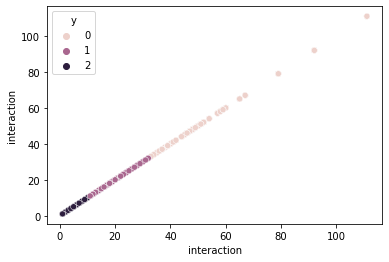

In [59]:
import seaborn as sns
sns.scatterplot(x=df['interaction'], y=df['interaction'], c=df['y'], hue=df['y'])

Ипортируем библиотеку train_test_split для разделения на обучающую и тренировучную выборку данных 
используем параметр stratyfy, чтобы разделилось по равному процентному соотношению регионов в наших данных

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
test, train =train_test_split(df, stratify=df['features.properties.region']) 

Убедимся в правильном распределении данных

In [63]:
test['features.properties.region'].value_counts()

Люблино                          662
Выхино-Жулебино                  628
Южное Бутово                     617
Спецтрассы                       595
Гольяново                        590
                                ... 
Михайлово-Ярцевское поселение     49
Воскресенское                     35
Кокошкино                         20
Поселок Восточный                 16
Мосрентген                        12
Name: features.properties.region, Length: 148, dtype: int64

In [64]:
train['features.properties.region'].value_counts()

Люблино                          221
Выхино-Жулебино                  210
Южное Бутово                     206
Спецтрассы                       198
Гольяново                        196
                                ... 
Михайлово-Ярцевское поселение     17
Воскресенское                     12
Кокошкино                          7
Поселок Восточный                  6
Мосрентген                         4
Name: features.properties.region, Length: 148, dtype: int64

# Session 3

Посмотрим зависимость признака 'interaction' с целевой переменной 
Можно легко увидеть разделение на три уровня угрозы в зависимости от иследуемого признака

<AxesSubplot:xlabel='interaction', ylabel='interaction'>

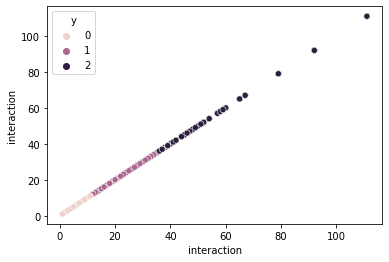

In [110]:
sns.scatterplot(x=df['interaction'], y=df['interaction'], c=df['y'], hue=df['y'])

In [65]:
c = df.corr()

<AxesSubplot:>

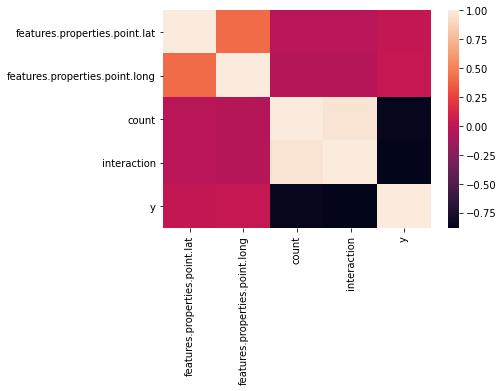

In [67]:
sns.heatmap(c)

In [68]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline 

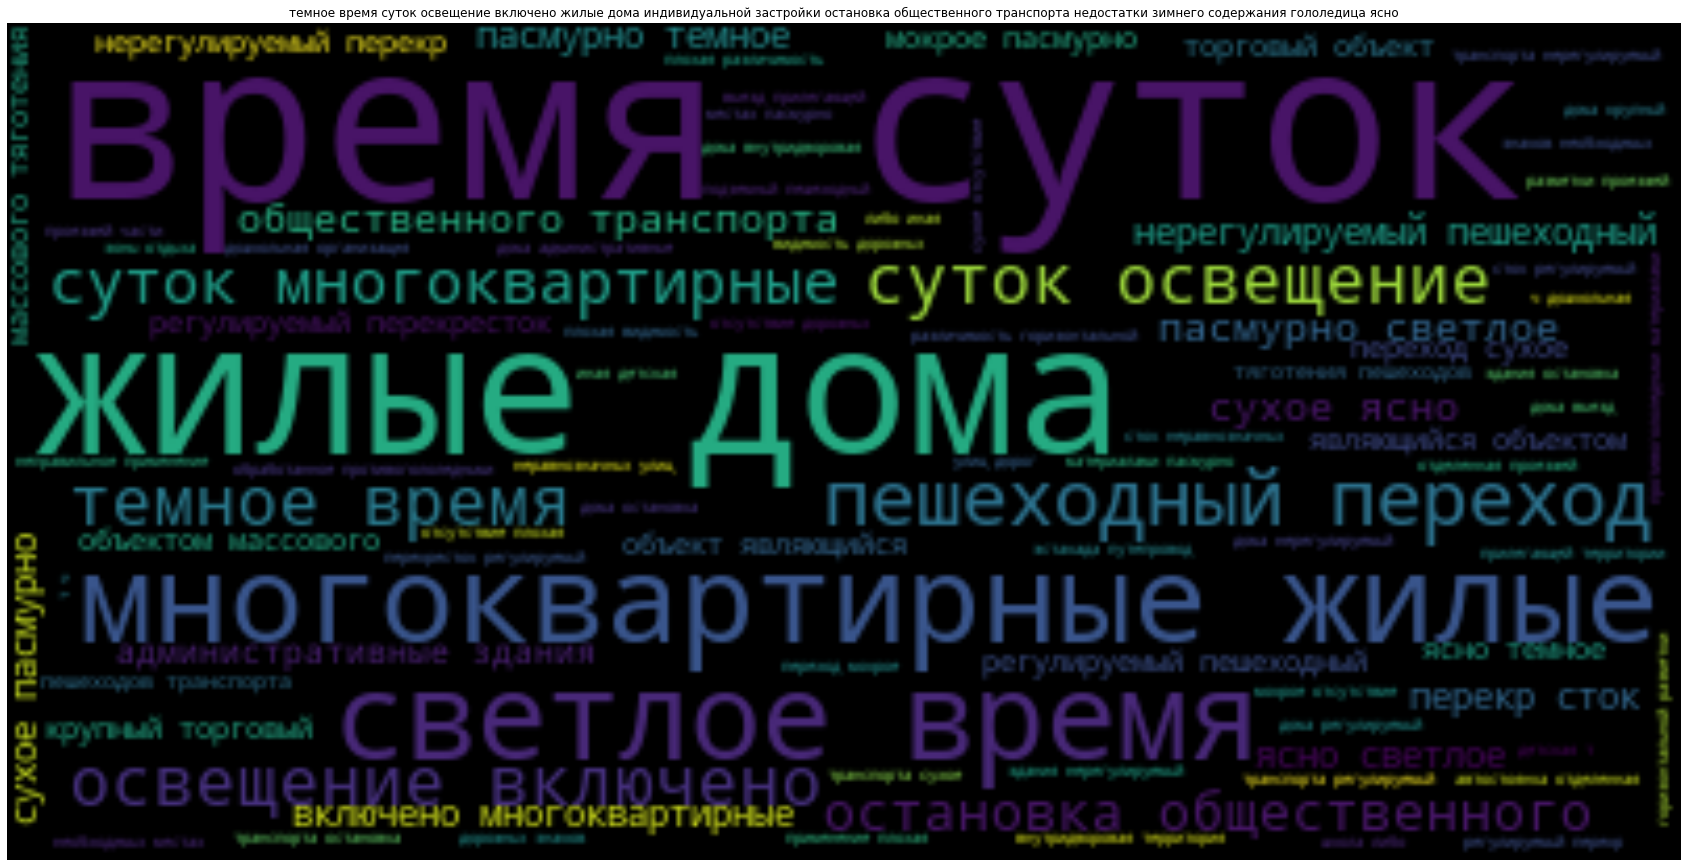

In [69]:
text1 = " ".join(feat for feat in df[df['y']==2].feat)
plt.figure(figsize = (30, 30))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df["feat"][0])
plt.axis("off")
plt.show()

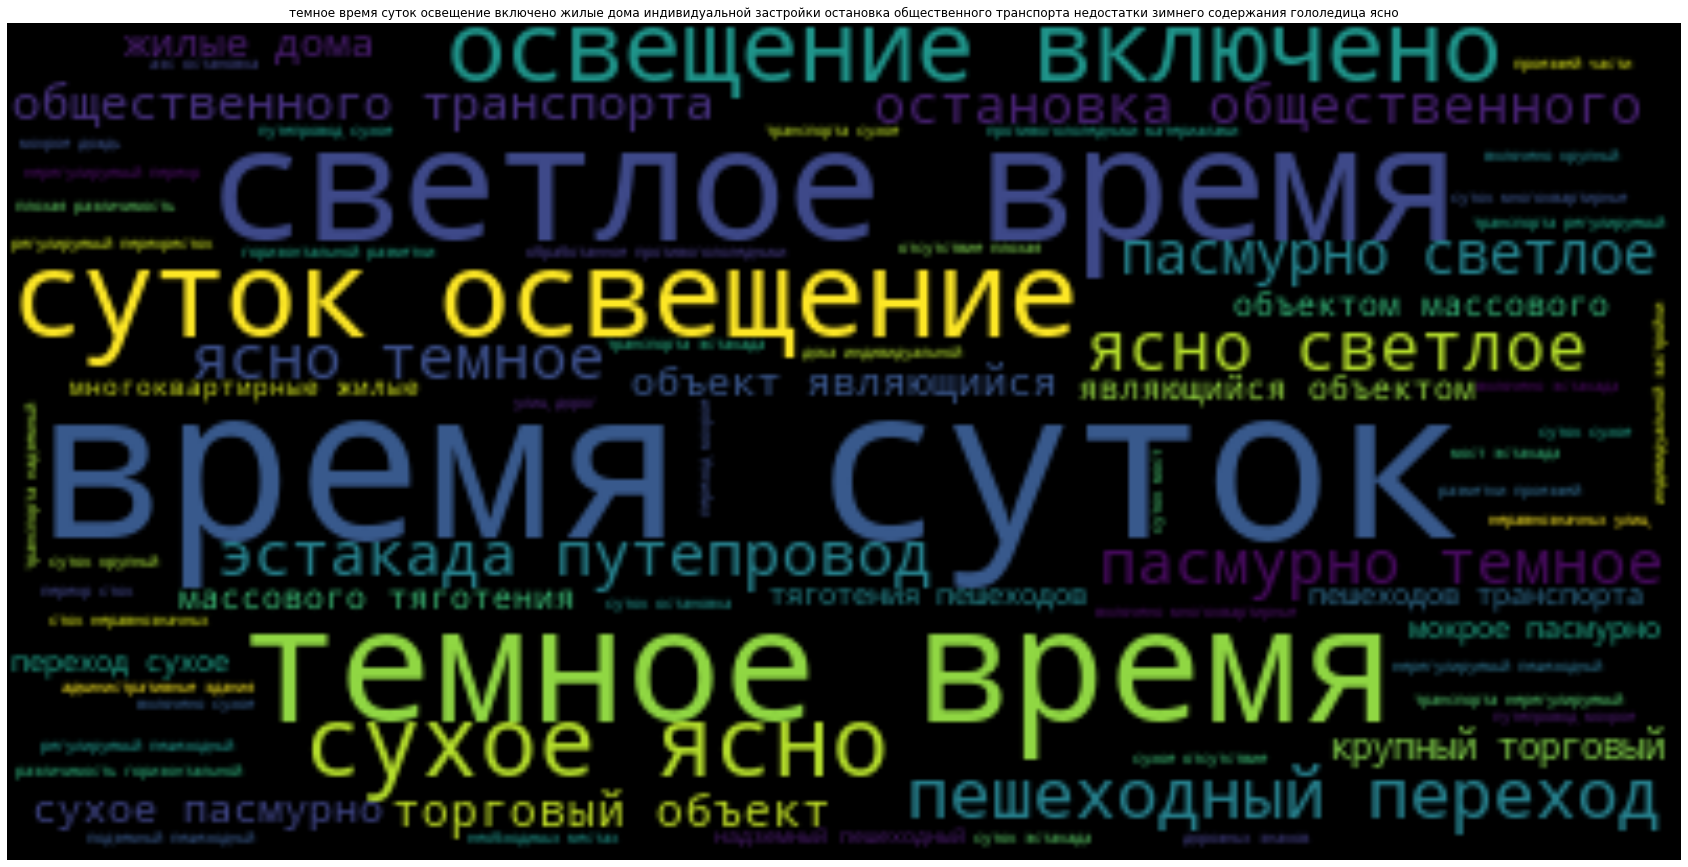

In [73]:
text1 = " ".join(feat for feat in df[df['y']==0].feat)
plt.figure(figsize = (30, 30))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df["feat"][0])
plt.axis("off")
plt.show()

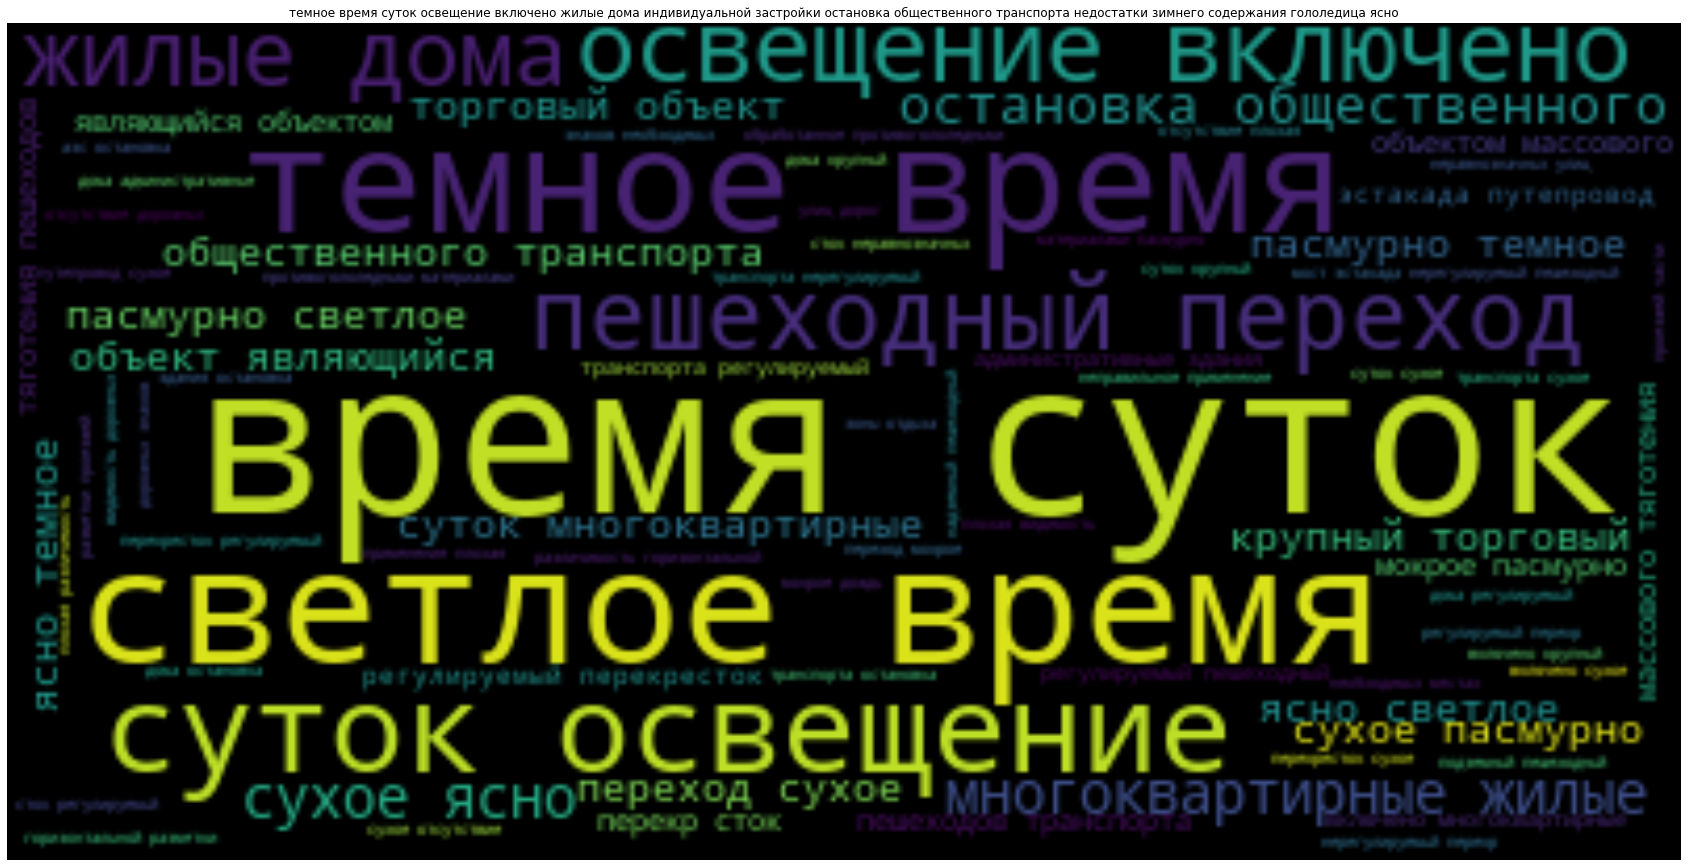

In [74]:
text1 = " ".join(feat for feat in df[df['y']==1].feat)
plt.figure(figsize = (30, 30))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df["feat"][0])
plt.axis("off")
plt.show()

## классификация


Приведем таргет к массиву данных для более оптимизированной классификации данных

In [75]:
y = df['y'].array

Для классификации выберу 3 модели:
- Алгоритм случайного леса - Подойдет отлично поскольку данных и признаков достаточно.
- Алгоритм ближайших соседей - как проверочная модель
- Алгоритм градиентного бустинга - как потенциально лучшая модель, на перемешанной выборке

In [76]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

Трансформируем признаки для обучения наших моделей

In [77]:
#feat
feat = Pipeline([
    ('selector', TextSelector(key="feat")),
    ('tfidf', TfidfVectorizer(stop_words = stopwords.words('russian')))
    ])

feat.fit_transform(df)

<57260x252 sparse matrix of type '<class 'numpy.float64'>'
	with 887802 stored elements in Compressed Sparse Row format>

In [78]:
#num
num = Pipeline([
    ('selector', NumericalSelector(key="interaction")),
    ('tfidf', StandardScaler())
    ])

num.fit_transform(df)

array([[-0.27311613],
       [-0.46737034],
       [-0.46737034],
       ...,
       [-0.17598902],
       [-0.56449745],
       [-0.56449745]])

In [79]:
from sklearn.pipeline import FeatureUnion
feat = FeatureUnion([('feat', feat),
                    ("num", num)])


try:
    X = feat.fit_transform(df.drop(columns = df.iloc[:,:5], axis = 1))
except Exception:
    print("я додик")

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df['features.properties.region'], shuffle=True)

In [81]:
val_score = []
train_score = []
estim = [10,100,500]
for est in estim:
    rfc = RandomForestClassifier(n_estimators=est)
    rfc.fit(X_train,y_train)
    val_score.append(rfc.score(X_test,y_test))
    train_score.append(rfc.score(X_train,y_train))

In [82]:
val_score,\
train_score

([0.9874956339504016, 0.9910583304226336, 0.990848760041914],
 [0.9997904296192804, 1.0, 1.0])

In [83]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       458
           1       0.95      0.99      0.97      2248
           2       1.00      1.00      1.00     11609

    accuracy                           0.99     14315
   macro avg       0.97      0.91      0.94     14315
weighted avg       0.99      0.99      0.99     14315



In [84]:
val_score = []
train_score = []
neigneighbors  = [1,2,3,5,10, 15, 20]
for n in neigneighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    val_score.append(knn.score(X_test,y_test))
    train_score.append(knn.score(X_train,y_train))

In [85]:
val_score,\
train_score

([0.9797415298637793,
  0.9806496681802306,
  0.9821166608452672,
  0.9833740831295843,
  0.9862382116660845,
  0.9826755151938527,
  0.9835836535103039],
 [1.0,
  0.992129467924089,
  0.9921527535219467,
  0.9909186168354872,
  0.9909186168354872,
  0.9873559203632554,
  0.9877052043311212])

In [86]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       458
           1       0.98      0.92      0.95      2248
           2       0.98      1.00      0.99     11609

    accuracy                           0.98     14315
   macro avg       0.98      0.95      0.97     14315
weighted avg       0.98      0.98      0.98     14315



In [87]:
val_score = []
train_score = []
estim = [10,100,500]
for est in estim:
    gb = GradientBoostingClassifier(n_estimators=est)
    gb.fit(X_train,y_train)
    val_score.append(gb.score(X_test,y_test))
    train_score.append(gb.score(X_train,y_train))
val_score,\
train_score

([1.0, 1.0, 1.0], [1.0, 1.0, 1.0])

In [88]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00      2248
           2       1.00      1.00      1.00     11609

    accuracy                           1.00     14315
   macro avg       1.00      1.00      1.00     14315
weighted avg       1.00      1.00      1.00     14315



In [98]:
###### teeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeessssssssssssssssssssssstttttttttttttttttttttttttttttttttttttt ########################
from sklearn.pipeline import make_pipeline
feat = Pipeline([('selector', TextSelector(key="feat")),
                 ('tfidf',
                  TfidfVectorizer(stop_words=stopwords.words('russian')))])
feat.fit_transform(df)

num = Pipeline([('selector', NumericalSelector(key="interaction")),
                ('tfidf', StandardScaler())])
num.fit_transform(df)

model = make_pipeline(FeatureUnion([('feat', feat), ("num", num)]), gb)
model.predict(train)

array([2, 2, 2, ..., 2, 2, 1])

## Map


In [100]:
import scipy
import geoplotlib

In [101]:
df.rename(columns={'features.properties.point.lat':'lat', 'features.properties.point.long':'lon'}, inplace=True)

In [109]:
geoplotlib.scatter(df[df['y']==2], color='g')
geoplotlib.scatter(df[df['y']==1], color='b')
geoplotlib.scatter(df[df['y']==0], color='r')
geoplotlib.show()

<img src='1633363333227.png'>